In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
import re
from wordcloud import WordCloud

In [91]:
data_path = Path("data") 
TWEETS_DATA = pd.read_csv(data_path / "Corona_NLP_train.csv",encoding='ISO-8859-1') 
TEST_DATA = pd.read_csv(data_path / "Corona_NLP_test.csv",encoding='ISO-8859-1')

# EDA 
We start exploring the data

In [6]:
pd.set_option('display.max_colwidth', None)
print(TWEETS_DATA.head())

   UserName  ScreenName   Location     TweetAt  \
0      3799       48751     London  16-03-2020   
1      3800       48752         UK  16-03-2020   
2      3801       48753  Vagabonds  16-03-2020   
3      3802       48754        NaN  16-03-2020   
4      3803       48755        NaN  16-03-2020   

                                                                                                                                                                                                                                                                                                                        OriginalTweet  \
0                                                                                                                                                                                                                     @MeNyrbie @Phil_Gahan @Chrisitv https://t.co/iFz9FAn2Pa and https://t.co/xX6ghGFzCC and https://t.co/I2NlzdxNo8   
1                                        

1. There are several id columns: Username and ScreenName
2. The date, location of the tweet are categorical
3. sentiment is categorical ordinal    
    
  **let's try to plot and understand the data better**

In [7]:
print(f"The number of unique ScreenNames: {np.unique(len(TWEETS_DATA['ScreenName']))}")
print(f"The number of unique UserNames: {np.unique(len(TWEETS_DATA['UserName']))}")
print("The length of the data: ", len(TWEETS_DATA))

The number of unique ScreenNames: [41157]
The number of unique UserNames: [41157]
The length of the data:  41157


First of all let's plot the Sentiment

/tmp/ipykernel_59903/2687516525.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=TWEETS_DATA, x='Sentiment', order=custom_order, palette='deep')


<Axes: xlabel='Sentiment', ylabel='count'>

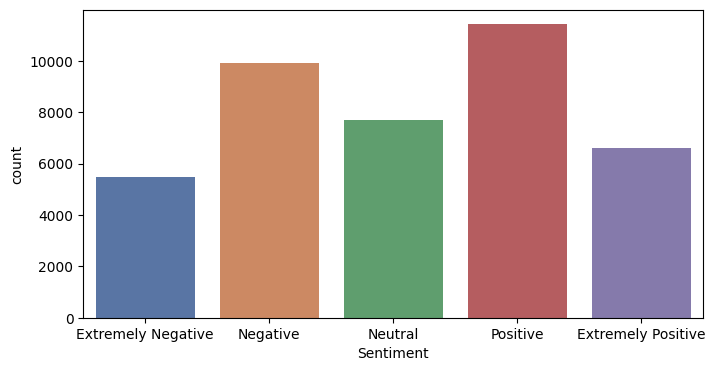

In [19]:
custom_order = ['Extremely Negative', 'Negative', 'Neutral', 'Positive', 'Extremely Positive']
plt.figure(figsize=(8, 4))
sns.countplot(data=TWEETS_DATA, x='Sentiment', order=custom_order, palette='deep')

In [10]:
print(TWEETS_DATA["TweetAt"].value_counts())

TweetAt
20-03-2020    3448
19-03-2020    3215
25-03-2020    2979
18-03-2020    2742
21-03-2020    2653
22-03-2020    2114
23-03-2020    2062
17-03-2020    1977
08-04-2020    1881
07-04-2020    1843
06-04-2020    1742
24-03-2020    1480
09-04-2020    1471
13-04-2020    1428
26-03-2020    1277
05-04-2020    1131
10-04-2020    1005
02-04-2020     954
11-04-2020     909
03-04-2020     810
12-04-2020     803
04-04-2020     767
16-03-2020     656
01-04-2020     630
27-03-2020     345
31-03-2020     316
14-04-2020     284
29-03-2020     125
30-03-2020      87
28-03-2020      23
Name: count, dtype: int64


We Can see that the data was taken in march and april,  when covid was at its initial peak, 
let's see if the month can tell us something.  
Maybe one month was more negative than the other

month
3    25499
4    15658
Name: count, dtype: int64


/tmp/ipykernel_59903/3598013752.py:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  TWEETS_DATA["month"] = pd.to_datetime(TWEETS_DATA["TweetAt"]).dt.month


Text(0.5, 1.0, 'Sentiment Distribution by Month')

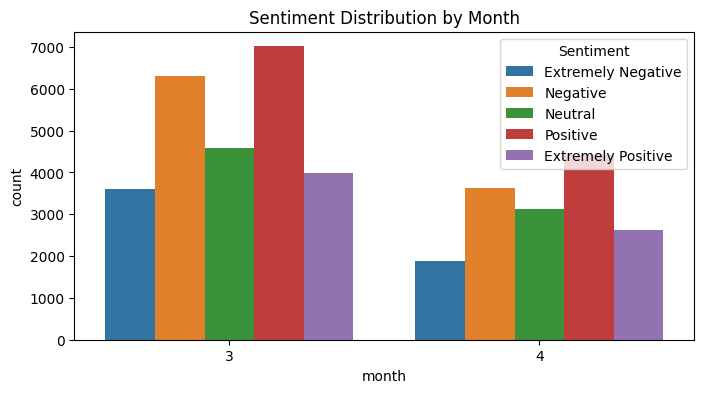

In [17]:
TWEETS_DATA["month"] = pd.to_datetime(TWEETS_DATA["TweetAt"]).dt.month
print(TWEETS_DATA["month"].value_counts())
## plot sentiment by month
plt.figure(figsize=(8,4))
sns.countplot(data=TWEETS_DATA, x='month', hue='Sentiment', hue_order=custom_order)
plt.title('Sentiment Distribution by Month')

It looks like it distributes the same, counting that march had twice has much tweets

In [105]:
print(TWEETS_DATA["Location"].value_counts())

Location
London                          540
United States                   528
London, England                 520
New York, NY                    395
Washington, DC                  373
                               ... 
Staffordshire Moorlands           1
Kithchener ON                     1
Tulsa, Ok                         1
Watford, South Oxhey, Bushey      1
i love you so much || he/him      1
Name: count, Length: 12220, dtype: int64


It seems that are too many different locations to try to put them together, we will look into it later $$$**##

**Now let's plot the tweets data, let's see what's poping as obvious**

<Axes: xlabel='text_len', ylabel='Count'>

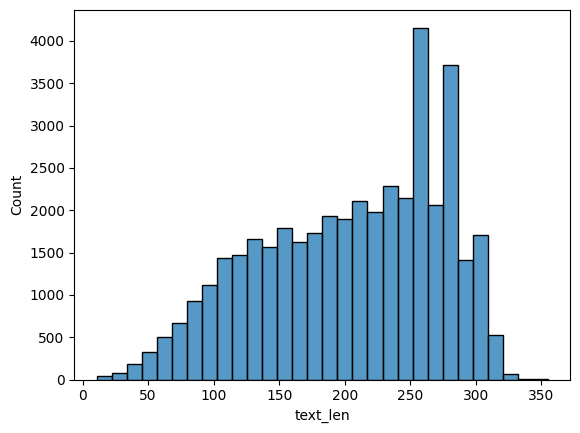

In [106]:
TWEETS_DATA['text_len'] = TWEETS_DATA['OriginalTweet'].str.len()
sns.histplot(TWEETS_DATA['text_len'], bins=30)

We know the tweeter (former X) had a 280 word limit, over it are paid users.  
let's see if it can gain us some knowledge

Ratio of positive to negative tweets in paid users: 1.302897278314311
The ratio of positive to negative tweets in free users: 1.1321485532011848


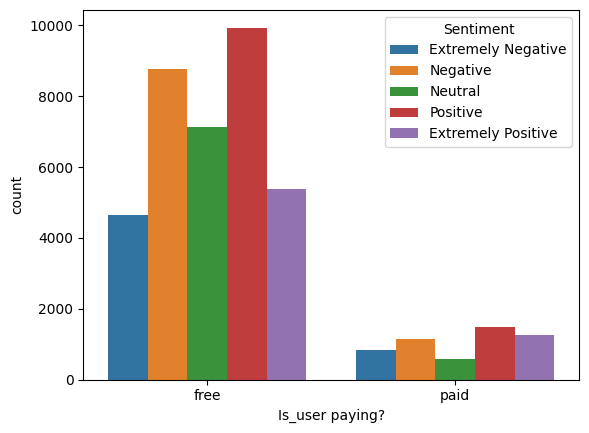

In [24]:
TWEETS_DATA["paid_user"] = TWEETS_DATA["OriginalTweet"].apply(lambda x: "paid" if len(x) > 280 else "free")
sns.countplot(data=TWEETS_DATA, x='paid_user', hue='Sentiment', hue_order=custom_order)
plt.xlabel("Is_user paying?")
paid_users = TWEETS_DATA[TWEETS_DATA['paid_user'] == 'paid']
free_users = TWEETS_DATA[TWEETS_DATA['paid_user'] == 'free']

positive = paid_users[paid_users['Sentiment'].isin(['Positive','Extremley Positive'])]['OriginalTweet'].tolist()
negative = paid_users[paid_users['Sentiment'].isin(['Negative','Extremley Negative'])]['OriginalTweet'].tolist()
print(f"Ratio of positive to negative tweets in paid users: {len(positive) / len(negative)}")

positive = free_users[free_users['Sentiment'].isin(['Positive','Extremley Positive'])]['OriginalTweet'].tolist()
negative = free_users[free_users['Sentiment'].isin(['Negative','Extremley Negative'])]['OriginalTweet'].tolist()
print(f"The ratio of positive to negative tweets in free users: {len(positive) / len(negative)}")


The ratios of negative vs positive are relatively the same for paid and free users, so status isn't a good indicator of sentiment.

## Wordclouds
Wordclouds are a great way to visualize the most common words in the tweets.

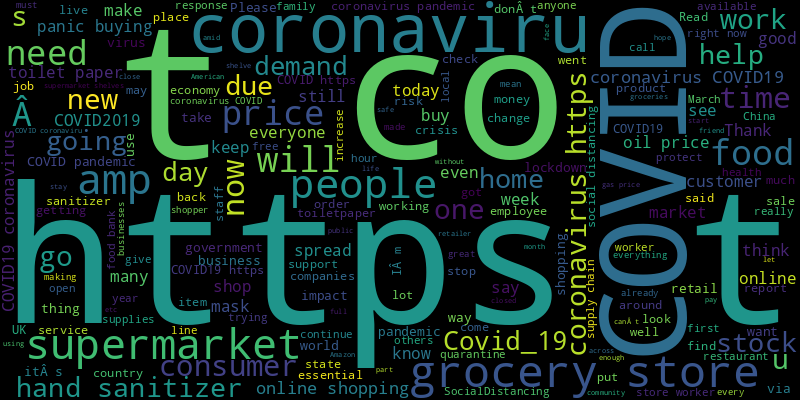

In [25]:
text = " ".join(TWEETS_DATA['OriginalTweet'])
WordCloud(width=800, height=400).generate(text).to_image()

https, amp, t, u, Â, itÂ, donÂ, IÂ  Are HTML tokens that we need to take out of the dataset! 

In [92]:
TWEETS_DATA["tweets"] = (
    TWEETS_DATA["OriginalTweet"]
    .str.lower()
    .apply(lambda x: re.sub(r'http\S+|www\S+|https\S+', '', x))  # remove URLs
    .str.replace(r'\bamp\b', '', regex=True)                     # remove 'amp'
    .str.strip()
)

#apply the same preprocessing to the test data
TEST_DATA["tweets"] = (
    TEST_DATA["OriginalTweet"]
    .str.lower()
    .apply(lambda x: re.sub(r'http\S+|www\S+|https\S+', '', x))  # remove URLs
    .str.replace(r'\bamp\b', '', regex=True)                     # remove 'amp'
    .str.strip()
)

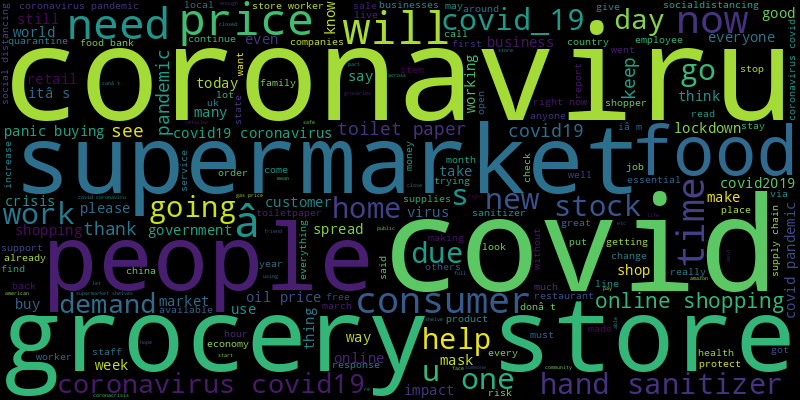

In [29]:
text = " ".join(TWEETS_DATA['tweets'])
WordCloud(width=800, height=400).generate(text).to_image()

In order to take care of weird signs like: 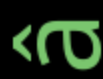  
We tried different encodings (latin and ISO-8859-1)  
We going to take it out manually

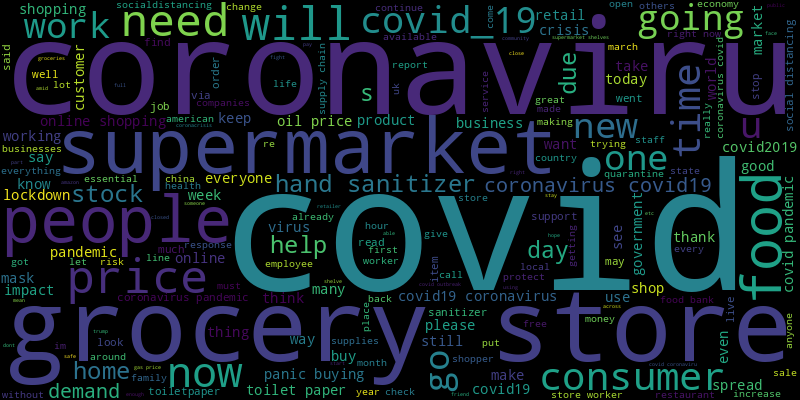

In [93]:
TWEETS_DATA["tweets"] = TWEETS_DATA["tweets"].apply(
    lambda x: x.encode('ascii', errors='ignore').decode()
)

TEST_DATA["tweets"] = TEST_DATA["tweets"].apply(
    lambda x: x.encode('ascii', errors='ignore').decode()
)
text = " ".join(TWEETS_DATA['tweets'])
WordCloud(width=800, height=400).generate(text).to_image()

Now we will explore more wordclouds - per sentiment

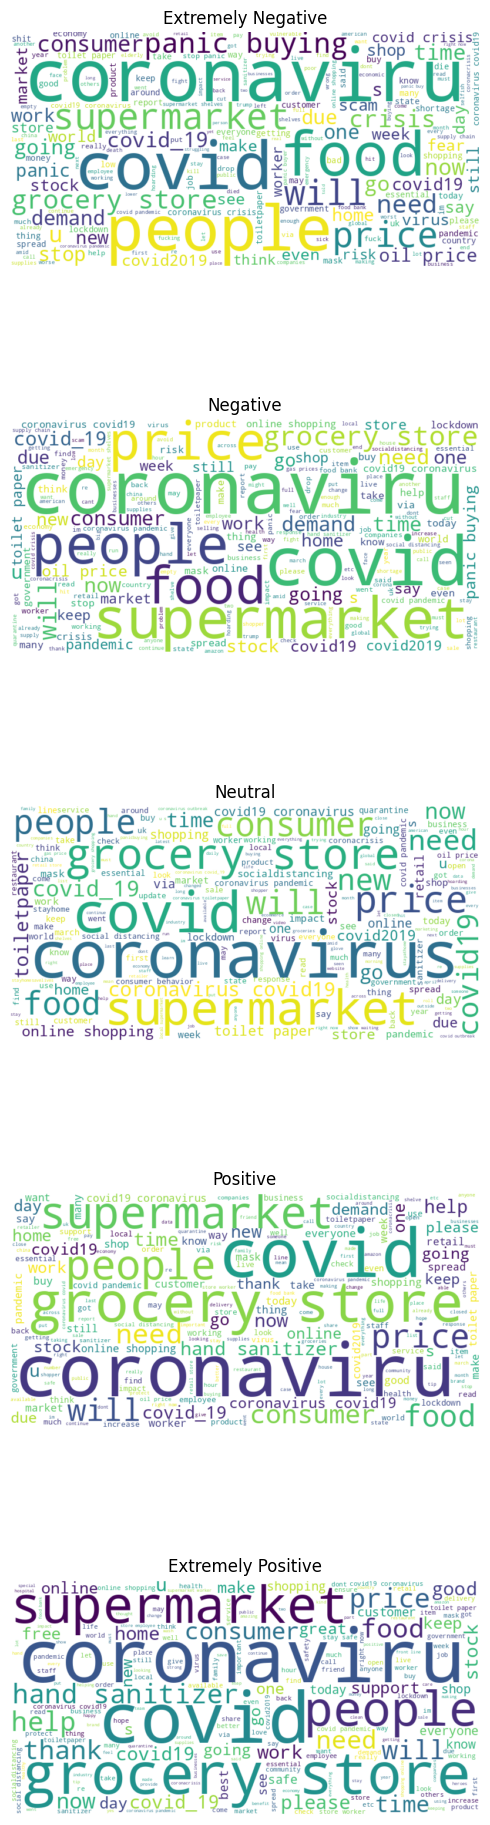

In [44]:
sentiments = custom_order
num_clouds = len(sentiments)

fig, axes = plt.subplots(5, 1, figsize=(5, 20))


# If only one sentiment, axes isn't a list — make it one
if num_clouds == 1:
    axes = [axes]

# Loop through each sentiment and create a word cloud
for ax, sentiment in zip(axes, sentiments):
    subset = TWEETS_DATA[TWEETS_DATA['Sentiment'] == sentiment]
    text = " ".join(subset['tweets'])
    
    wc = WordCloud(width=800, height=400, background_color='white').generate(text)
    
    ax.imshow(wc, interpolation='bilinear')
    ax.set_title(sentiment)
    ax.axis('off')

plt.tight_layout()
plt.show()


Looks like all wordclouds contain similar words, perhaps dipper analysis should be done while extracting covid related key words, to explore better sentiment related words (becuase obsviously positive and negative tweets discussed covid)

**As we all know X (former tweeter) has # and @ in the tweets, let's try to gain some insight from it**

/tmp/ipykernel_59903/3875072588.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=filtered_hashtags, x='hashtags', order=top_hashtags, palette='viridis', ax=axes[0])
/tmp/ipykernel_59903/3875072588.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=filtered_ats, x='ats', order=top_ats, palette='coolwarm', ax=axes[1])


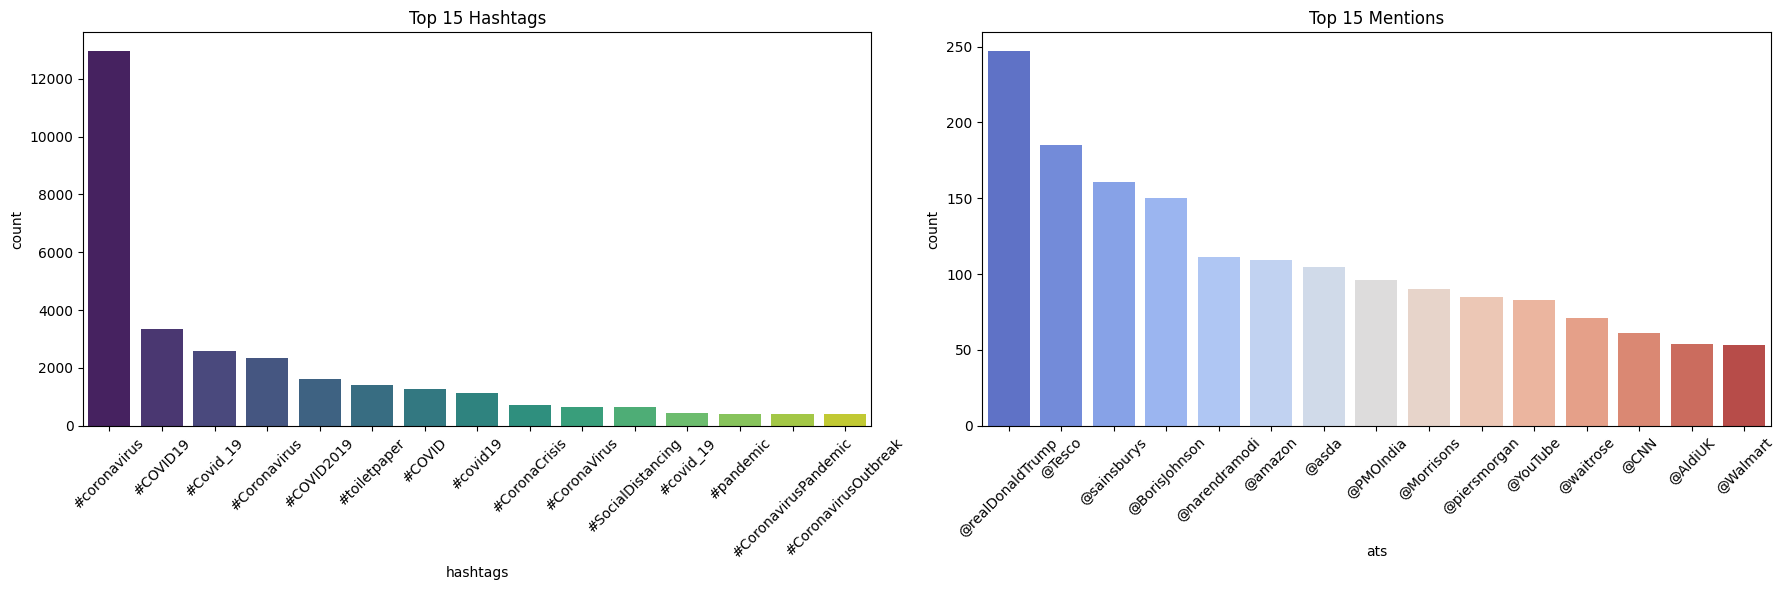

In [63]:

# Extract @ and #
TWEETS_DATA['hashtags'] = TWEETS_DATA['OriginalTweet'].str.findall(r'#\w+')
TWEETS_DATA['ats'] = TWEETS_DATA['OriginalTweet'].str.findall(r'@\w+')

# Explode and clean
hashtags_df = TWEETS_DATA.explode('hashtags')
ats_df = TWEETS_DATA.explode('ats')

hashtags_df = hashtags_df[hashtags_df['hashtags'].notna()]
ats_df = ats_df[ats_df['ats'].notna()]

# Top N
top_n = 15
top_hashtags = hashtags_df['hashtags'].value_counts().nlargest(top_n).index
top_ats = ats_df['ats'].value_counts().nlargest(top_n).index

# Filtered
filtered_hashtags = hashtags_df[hashtags_df['hashtags'].isin(top_hashtags)]
filtered_ats = ats_df[ats_df['ats'].isin(top_ats)]

# Plot side-by-side
fig, axes = plt.subplots(1, 2, figsize=(18, 6), sharey=False)

sns.countplot(data=filtered_hashtags, x='hashtags', order=top_hashtags, palette='viridis', ax=axes[0])
axes[0].set_title(f"Top {top_n} Hashtags")
axes[0].tick_params(axis='x', rotation=45)

sns.countplot(data=filtered_ats, x='ats', order=top_ats, palette='coolwarm', ax=axes[1])
axes[1].set_title(f"Top {top_n} Mentions")
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


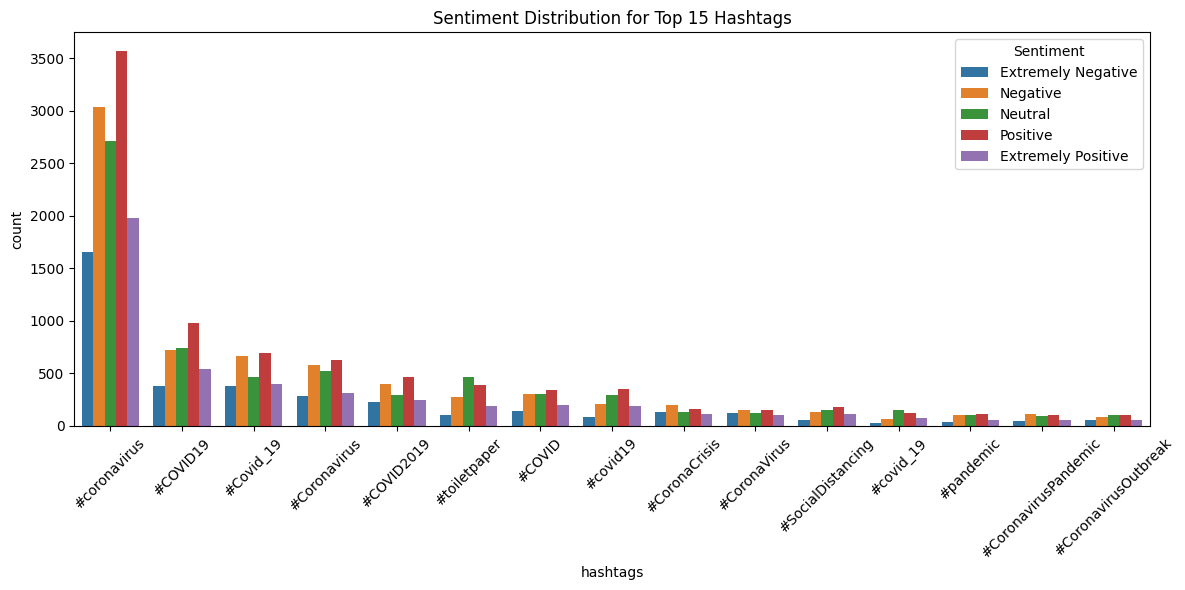

In [49]:
# Filter again to include Sentiment
sentiment_hashtags_df = hashtags_df[hashtags_df['hashtags'].isin(top_hashtags)]

plt.figure(figsize=(12, 6))
sns.countplot(data=sentiment_hashtags_df, x='hashtags', hue='Sentiment', order=top_hashtags, hue_order=custom_order)
plt.title('Sentiment Distribution for Top 15 Hashtags')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


We can see that hashtags are pretty balanced across sentiments, and also that many are variations on same words, like covid, covid19, coronavirus, corona, etc. So hashtags for now don't seem useful.

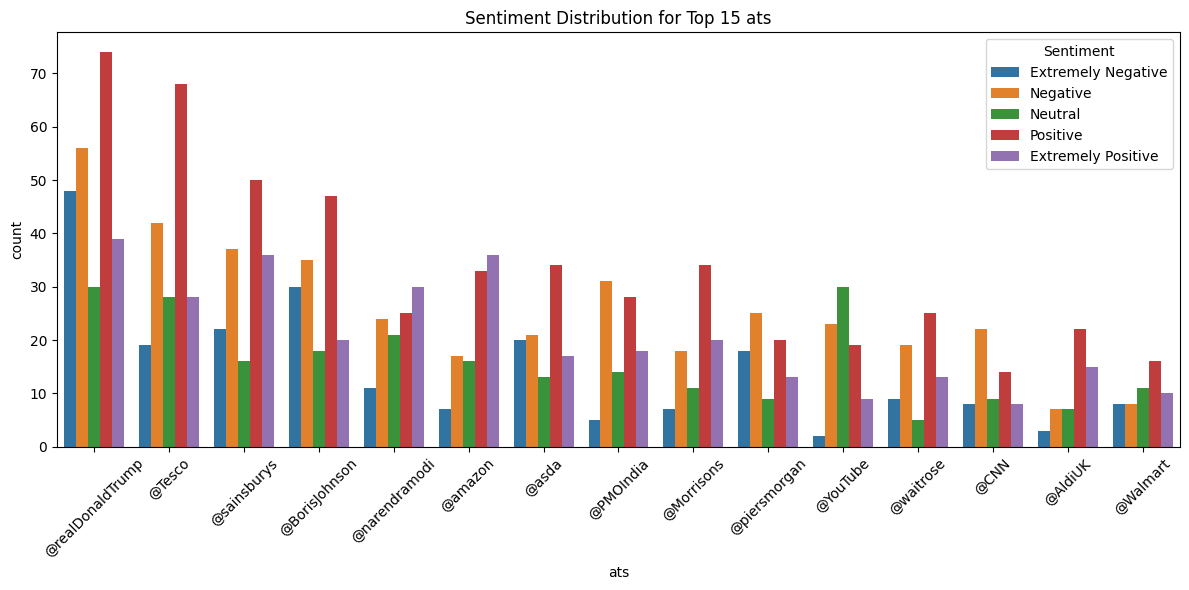

In [48]:
# Filter again to include Sentiment
sentiment_ats_df = ats_df[ats_df['ats'].isin(top_ats)]

plt.figure(figsize=(12, 6))
sns.countplot(data=sentiment_ats_df, x='ats', hue='Sentiment', order=top_ats, hue_order=custom_order)
plt.title('Sentiment Distribution for Top 15 ats')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


@ are more varied, but also are spread across all sentiments

# Preprocessing
After the exploring and some preprocessing we already made (removing special characters, html...), we shall prepare our data to the models of choice

In [94]:
#prepare data for models: leave only text and labels
train_df = TWEETS_DATA[['tweets', 'Sentiment']]
test_df = TEST_DATA[['tweets', 'Sentiment']]

In [ ]:
# Split into train (70%) and temp (30%)
train_df, eval_df = train_test_split(train_df, test_size=0.3, random_state=42, stratify=df['Sentiment'])


# Keep the required columns
train_df = train_df[['tweets', 'Sentiment']]
eval_df = eval_df[['tweets', 'Sentiment']]



# Save (current directory)
train_df.to_csv('train_data.csv', index=False)
test_df.to_csv('test_data.csv', index=False)
eval_df.to_csv('eval_data.csv', index=False)

SyntaxError: invalid syntax (2963292137.py, line 11)

# Models


In [90]:
import torch
from torch.utils.data import DataLoader, Dataset
from torch import nn, optim
from sklearn.model_selection import train_test_split
from pathlib import Path
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

import optuna
import wandb
from transformers import AutoTokenizer, AutoModelForMaskedLM, AutoModel, AutoModelForSequenceClassification, AutoConfig, RobertaForSequenceClassification, BertForSequenceClassification

In [86]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [ ]:
#second model - bertweet - based on RoBERTa, but trained on 850M english tweets (some related to COVID-19)
####we can also choose this one instead - trained on tweets regarding our domain - covid-19: https://huggingface.co/digitalepidemiologylab/covid-twitter-bert-v2
tweet_model_name = "vinai/bertweet-base"

#checking backbone
tweet_config = AutoConfig.from_pretrained(tweet_model_name)
print(tweet_config.model_type) #printed roberta

tweet_tokenizer = AutoTokenizer.from_pretrained(tweet_model_name)
tweet_model = model = RobertaForSequenceClassification.from_pretrained(tweet_model_name, num_labels=5)


covid_model_name = 'digitalepidemiologylab/covid-twitter-bert'

covid_config = AutoConfig.from_pretrained(covid_model_name)
print(covid_config.model_type)  # printed bert

covid_tokenizer = AutoTokenizer.from_pretrained(covid_model_name)
covid_model = BertForSequenceClassification.from_pretrained(covid_model_name, num_labels=5)


bert


ImportError: 
AutoModelForSequenceClassification requires the PyTorch library but it was not found in your environment. Check out the instructions on the
installation page: https://pytorch.org/get-started/locally/ and follow the ones that match your environment.
Please note that you may need to restart your runtime after installation.
